# Exercise 1 - ANOVA F-test and Hierarchical Clustering (10 points)


**Imports**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import statsmodels.stats.multitest as multitest
import scipy
from scipy.spatial.distance import pdist

## Load the golub.csv dataset. It contains gene expression data of 3051 genes from 38 tumor mRNA samples. The expression data is organized in a matrix where rows correspond to genes and columns to samples. The tumor classification for the samples is given in the file “golub.cl.csv”.

In [3]:
df = pd.read_csv("golub.csv", index_col='gene_name')

In [4]:
df.head()

V1       V2       V3       V4       V5  \
gene_name                                                                  
AFFX-HUMISGF3A/M97935_MA_at -1.45769 -1.39420 -1.42779 -1.40715 -1.42668   
AFFX-HUMISGF3A/M97935_MB_at -0.75161 -1.26278 -0.09052 -0.99596 -1.24245   
AFFX-HUMISGF3A/M97935_3_at   0.45695 -0.09654  0.90325 -0.07194  0.03232   
AFFX-HUMRGE/M10098_5_at      3.13533  0.21415  2.08754  2.23467  0.93811   
AFFX-HUMRGE/M10098_M_at      2.76569 -1.27045  1.60433  1.53182  1.63728   

                                  V6       V7       V8       V9      V10  ...  \
gene_name                                                                 ...   
AFFX-HUMISGF3A/M97935_MA_at -1.21719 -1.37386 -1.36832 -1.47649 -1.21583  ...   
AFFX-HUMISGF3A/M97935_MB_at -0.69242 -1.37386 -0.50803 -1.04533 -0.81257  ...   
AFFX-HUMISGF3A/M97935_3_at   0.09713 -0.11978  0.23381  0.23987  0.44201  ...   
AFFX-HUMRGE/M10098_5_at      2.24089  3.36576  1.97859  2.66468 -1.21583  ...   
AFFX-HUMRGE/M10098_M_at      1.85697  3.01847  1.12853  2.17016 -1.21583  ...   

                                 V29      V30      V31      V32      V33  \
gene_name                                                                  
AFFX-HUMISGF3A/M97935_MA_at -1.08902 -1.29865 -1.26183 -1.44434  1.10147   
AFFX-HUMISGF3A/M97935_MB_at -1.08902 -1.05094 -1.26183 -1.25918  0.97813   
AFFX-HUMISGF3A/M97935_3_at  -0.43377 -0.10823 -0.29385  0.05067  1.69430   
AFFX-HUMRGE/M10098_5_at      0.29598 -1.29865  2.76869  2.08960  0.70003   
AFFX-HUMRGE/M10098_M_at     -1.08902 -1.29865  2.00518  1.17454 -1.47218   

                                 V34      V35      V36      V37      V38  
gene_name                                                                 
AFFX-HUMISGF3A/M97935_MA_at -1.34158 -1.22961 -0.75919  0.84905 -0.66465  
AFFX-HUMISGF3A/M97935_MB_at -0.79357 -1.22961 -0.71792  0.45127 -0.45804  
AFFX-HUMISGF3A/M97935_3_at  -0.12472  0.04609  0.24347  0.90774  0.46509  
AFFX-HUMRGE/M10098_5_at      0.13854  1.75908  0.06151  1.30297  0.58186  
AFFX-HUMRGE/M10098_M_at     -1.34158  1.55086 -1.18107  1.01596  0.15788  

[5 rows x 38 columns]

## 1. ANOVA F-test


### a) Familiarize yourself with multiple test corrections and briefly explain its purpose. (1 point) 

Multiple testing correction is essential while performing a set of statistical inferences, meaning the more inferences are done the more likely that there is a false positive. We would need to correct the p-values so that the overall error rate is equal to or less than the significant level. 

### b) Using the Shapiro-Wilk test and Levene test, while accounting for multiple testing problem using Benjamini/Hochberg correction, remove the genes (FDR / adj. P-value ≤ 0.05) that violate the ANOVA F-test assumptions.  
(3 points) 

In [5]:
# The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution.
for i in df.index:
    df.loc[i, 'shapiro']= scipy.stats.shapiro(df.loc[i, df.columns[:38]])[1]

In [6]:
# The Levene test, tests the null hypothesis that all input samples are from populations with equal variances.
for i in df.index:
    df.loc[i, 'levene'] = scipy.stats.levene(df.loc[i, df.columns[:27]], df.loc[i, df.columns[27:38]])[1]

In [7]:
# correct the multiple test error using Benjamini/Hochberg correction
df.loc[:, 'corrected_shapiro'] = multitest.multipletests(df['shapiro'], method='fdr_bh')[1]

In [8]:
# correct the multiple test error using Benjamini/Hochberg correction
df.loc[:, 'corrected_levene'] = multitest.multipletests(df['levene'], method='fdr_bh')[1]

In [9]:
# select the genes that follow the ANOVA F-test assumptions
df = df.loc[(df['corrected_shapiro']>=0.05) & (df['corrected_levene']>=0.05)]

# remove the unessential columns
df = df[df.columns[:38]]

In [10]:
df.shape

(1718, 38)

In [11]:
df.head()

V1       V2       V3       V4       V5  \
gene_name                                                                 
AFFX-HUMISGF3A/M97935_3_at  0.45695 -0.09654  0.90325 -0.07194  0.03232   
AFFX-HUMTFRR/M11507_5_at   -0.56223  0.05358  0.12612 -0.84016 -0.43710   
AFFX-M27830_5_at            2.42764  1.34873  1.61846  1.80194  0.81975   
AFFX-M27830_M_at            2.40116  1.83222  1.62478  1.59089  0.75700   
AFFX-M27830_3_at            0.80633  0.26994  0.49549  0.15222 -0.03737   

                                 V6       V7       V8       V9      V10  ...  \
gene_name                                                                ...   
AFFX-HUMISGF3A/M97935_3_at  0.09713 -0.11978  0.23381  0.23987  0.44201  ...   
AFFX-HUMTFRR/M11507_5_at   -0.38536 -0.87284  0.07453 -0.36118 -1.21583  ...   
AFFX-M27830_5_at            2.18509  2.69012  2.05478  2.02261 -1.21583  ...   
AFFX-M27830_M_at            2.32267  1.64407  2.10957  1.64361  0.32217  ...   
AFFX-M27830_3_at           -0.27141  0.48896  0.78938  0.22388  0.66716  ...   

                                V29      V30      V31      V32      V33  \
gene_name                                                                 
AFFX-HUMISGF3A/M97935_3_at -0.43377 -0.10823 -0.29385  0.05067  1.69430   
AFFX-HUMTFRR/M11507_5_at    0.51484 -0.13601 -0.16682 -0.20888  0.25911   
AFFX-M27830_5_at           -0.16682 -0.69018  2.01143  1.28429  0.38541   
AFFX-M27830_M_at            1.03327  1.16119  2.25875  1.62017  0.91712   
AFFX-M27830_3_at           -0.13951 -0.14412  0.04123  0.56077  0.96868   

                                V34      V35      V36      V37      V38  
gene_name                                                                
AFFX-HUMISGF3A/M97935_3_at -0.12472  0.04609  0.24347  0.90774  0.46509  
AFFX-HUMTFRR/M11507_5_at   -0.21631  0.19129 -0.57687  0.44808  1.19275  
AFFX-M27830_5_at            0.23659  1.54027  0.23886  1.05465  2.00691  
AFFX-M27830_M_at            1.50523  2.21754  1.23143  1.87913  2.49036  
AFFX-M27830_3_at            0.87498  1.05000  0.51991  0.63487  0.08813  

[5 rows x 38 columns]

### c) For each gene in the dataset, perform the ANOVA F-test (only for the subset of genes that met the assumptions) to see whether the gene is significantly differentially expressed between the two types of Leukemia. (1 point)


In [12]:
# ANOVA F-test
for i in df.index:
    df.loc[i, 'F'], df.loc[i, 'P'] = scipy.stats.f_oneway(df.loc[i, df.columns[:27]], df.loc[i, df.columns[27:38]])

In [13]:
df.head()

V1       V2       V3       V4       V5  \
gene_name                                                                 
AFFX-HUMISGF3A/M97935_3_at  0.45695 -0.09654  0.90325 -0.07194  0.03232   
AFFX-HUMTFRR/M11507_5_at   -0.56223  0.05358  0.12612 -0.84016 -0.43710   
AFFX-M27830_5_at            2.42764  1.34873  1.61846  1.80194  0.81975   
AFFX-M27830_M_at            2.40116  1.83222  1.62478  1.59089  0.75700   
AFFX-M27830_3_at            0.80633  0.26994  0.49549  0.15222 -0.03737   

                                 V6       V7       V8       V9      V10  ...  \
gene_name                                                                ...   
AFFX-HUMISGF3A/M97935_3_at  0.09713 -0.11978  0.23381  0.23987  0.44201  ...   
AFFX-HUMTFRR/M11507_5_at   -0.38536 -0.87284  0.07453 -0.36118 -1.21583  ...   
AFFX-M27830_5_at            2.18509  2.69012  2.05478  2.02261 -1.21583  ...   
AFFX-M27830_M_at            2.32267  1.64407  2.10957  1.64361  0.32217  ...   
AFFX-M27830_3_at           -0.27141  0.48896  0.78938  0.22388  0.66716  ...   

                                V31      V32      V33      V34      V35  \
gene_name                                                                 
AFFX-HUMISGF3A/M97935_3_at -0.29385  0.05067  1.69430 -0.12472  0.04609   
AFFX-HUMTFRR/M11507_5_at   -0.16682 -0.20888  0.25911 -0.21631  0.19129   
AFFX-M27830_5_at            2.01143  1.28429  0.38541  0.23659  1.54027   
AFFX-M27830_M_at            2.25875  1.62017  0.91712  1.50523  2.21754   
AFFX-M27830_3_at            0.04123  0.56077  0.96868  0.87498  1.05000   

                                V36      V37      V38          F         P  
gene_name                                                                   
AFFX-HUMISGF3A/M97935_3_at  0.24347  0.90774  0.46509   0.012097  0.913031  
AFFX-HUMTFRR/M11507_5_at   -0.57687  0.44808  1.19275  20.086635  0.000072  
AFFX-M27830_5_at            0.23886  1.05465  2.00691   0.124273  0.726501  
AFFX-M27830_M_at            1.23143  1.87913  2.49036   0.023705  0.878498  
AFFX-M27830_3_at            0.51991  0.63487  0.08813   0.145703  0.704919  

[5 rows x 40 columns]

### d) Use Bonferroni correction to select the genes that are significant. (1 point)

Hint: Due to our analysis, we now know which genes are significantly differentially expressed between groups. These will be the best features to use in order to get good cluster separation.

In [14]:
# using Bonferroni Holm to correct the p_values for family-wise error rate
df.loc[:, 'corrected_p'] = multitest.multipletests(df['P'], method='bonferroni')[1] 

In [15]:
df = df.loc[df.corrected_p<0.05]
df = df[df.columns[:38]]


In [16]:
df.shape

(63, 38)

In [17]:
df

V1       V2       V3       V4       V5       V6  \
gene_name                                                                
D14658_at         0.86019 -0.14271  0.67037  0.70706  0.87697  0.15182   
D14874_at        -1.00702 -0.89365 -1.21154 -1.40715 -1.42668 -0.76365   
D63874_at         1.98050  2.81151  2.75595  2.75933  2.79949  2.47102   
D86967_at         2.02151  1.47483  1.10538  0.66679  0.72396  1.07706   
HG1612-HT1612_at  1.88962  1.58426  2.13685  1.72258  1.43950  2.17913   
...                   ...      ...      ...      ...      ...      ...   
U72936_s_at       0.05235 -0.33975 -0.29319  0.01439 -0.31220 -0.65115   
U90552_s_at       0.54413  0.17590  0.83827  0.97451  0.39053  0.80477   
M19045_f_at      -0.22142  1.78025  1.52715  1.02148  1.74538  1.89249   
M31523_at         0.92234  0.54933  0.10862  1.21964  0.96513  0.69793   
U29175_at         1.08935  0.22701  0.31272  0.47450  0.27257  1.05565   

                       V7       V8       V9      V10  ...      V29      V30  \
gene_name                                             ...                     
D14658_at         0.71771  0.25247  0.93324  0.22176  ... -0.20573 -0.46365   
D14874_at        -1.37386 -1.36832 -0.86998 -0.84890  ... -0.46664 -0.40013   
D63874_at         2.49089  2.11438  2.44633  2.71856  ...  2.39561  1.86909   
D86967_at         0.64965  1.41426  1.42960  1.59343  ...  0.16246  0.58696   
HG1612-HT1612_at  2.00410  2.01002  2.18948  2.34451  ...  0.33318  1.12038   
...                   ...      ...      ...      ...  ...      ...      ...   
U72936_s_at       0.19584  0.03631 -0.18756 -1.21583  ... -1.08902 -1.03880   
U90552_s_at       0.89062  0.95740  0.31765 -0.06574  ... -0.13281 -0.15231   
M19045_f_at       0.94753  1.33754  1.30463  1.60637  ...  2.25191  2.11697   
M31523_at         0.72464  1.32339  0.79254  0.15163  ... -0.13281 -0.54233   
U29175_at         0.22157  0.22115  0.97095  0.64551  ... -0.02267 -0.69414   

                      V31      V32      V33      V34      V35      V36  \
gene_name                                                                
D14658_at         0.52542 -0.22934 -0.36515 -0.22708 -0.07911  0.00368   
D14874_at        -0.66887 -0.54280 -0.07151 -0.59948 -0.33210  0.29695   
D63874_at         2.03847  1.53384  1.39613  2.37691  2.64517  1.76198   
D86967_at         1.04758  0.02682  0.18013  0.98861  0.56381  0.53301   
HG1612-HT1612_at  0.56112  1.55380  1.18398  0.33399  0.63183  0.53948   
...                   ...      ...      ...      ...      ...      ...   
U72936_s_at      -1.26183 -0.54935 -1.47218 -0.75904 -1.11093 -1.25453   
U90552_s_at      -0.17210  0.63375  0.34293 -0.83998 -0.26871  0.10749   
M19045_f_at       2.54411  2.47160  2.72025  2.09162  1.90268  2.79245   
M31523_at        -0.06494  0.25829 -0.87699 -0.33927  0.08948 -1.20703   
U29175_at        -0.05560  0.28067 -0.69228  0.04293  0.09446 -0.22265   

                      V37      V38  
gene_name                           
D14658_at        -0.17442 -0.86470  
D14874_at        -0.23353 -0.67345  
D63874_at         1.77075  2.47364  
D86967_at         0.35484  0.63452  
HG1612-HT1612_at  1.08154  1.04615  
...                   ...      ...  
U72936_s_at      -1.34579 -1.24593  
U90552_s_at      -0.33589 -0.06085  
M19045_f_at       2.85025  1.66368  
M31523_at        -0.79439 -0.40721  
U29175_at        -0.17003 -0.37166  

[63 rows x 38 columns]

## 2. Plot 2 dendrograms using the selected genes:


### a) Using hierarchical clustering, plot one dendrogram using a single linkage approach and another one using a ward approach. (1 point)

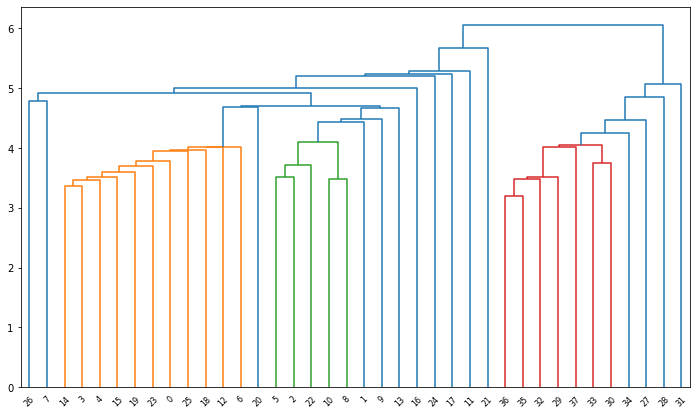

In [18]:
linked_single = linkage(df.transpose(), 'single')
plt.figure(figsize=(12, 7))
dendrogram(linked_single,
            orientation='top',            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

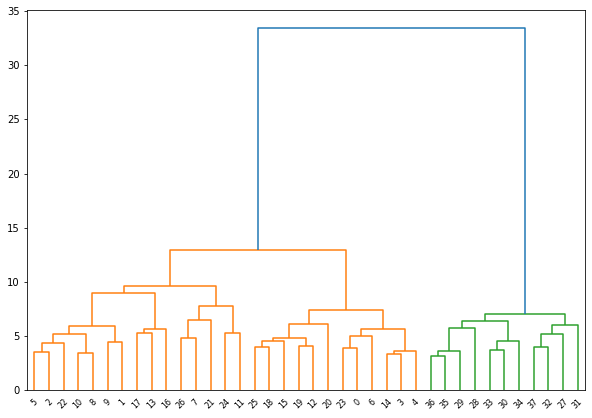

In [19]:
linked_ward = linkage(df.transpose(), 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked_ward,
            orientation='top',            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### b) Which approach would you recommend based on the dendrograms? Why? (1 point)


Ward. Based on the dendrograms, we can see that the ward approach did a better job at clustering the genes into two separated class. Note: we already know that we have two classes of tumor.

### c) Familiarize yourself with Cophenetic correlation coefficient and calculate the cophenetic correlation distance for both single linkage as well as ward. (1 point)

In [20]:
print("the cophenetic correlation distance for single linkage is: ", scipy.cluster.hierarchy.cophenet(linked_single, pdist(df.transpose().to_numpy()))[0])
print("the cophenetic correlation distance for ward approach is: ", scipy.cluster.hierarchy.cophenet(linked_ward, pdist(df.transpose().to_numpy()))[0])

the cophenetic correlation distance for single linkage is:  0.8659149737166386
the cophenetic correlation distance for ward approach is:  0.8881228093866735


### d) Based on the cophenetic correlation distance, which approach performed better? (1 point)

Answer: The value of the cophenetic correlation distance for ward is greater than the value for single linkage. Thus, the ward approach is doing a better job in our case.

# Exercise 2 - PCA (9 points)

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Using the same leukemia dataset (all genes), generate the feature matrix (transposed leukemia dataset) and the class labels (golub.cl.csv).

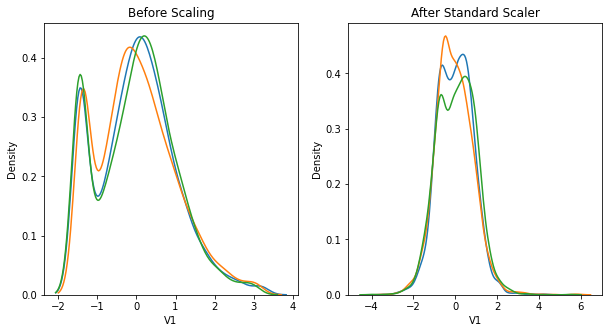

In [23]:
X = pd.read_csv('golub.csv', index_col=0)
y = pd.read_csv('golub.cl.csv')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.transpose())

# Why the data should be scaled
X_scaled_df = pd.DataFrame(index=X.columns, data=X_scaled, columns=X.index).transpose()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X['V1'], ax=ax1)
sns.kdeplot(X['V2'], ax=ax1)
sns.kdeplot(X['V3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(X_scaled_df['V1'], ax=ax2)
sns.kdeplot(X_scaled_df['V2'], ax=ax2)
sns.kdeplot(X_scaled_df['V3'], ax=ax2)
plt.show()

## 1. Perform a PCA on the feature matrix and answer the following,

In [24]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, index=X.columns)
pca_df['label'] = y['x'].values

### a) How many PC’s do you need to explain at least 95% of the variance? (1 point)


31 PC's are needed out of 37 for an explained variance of 95%


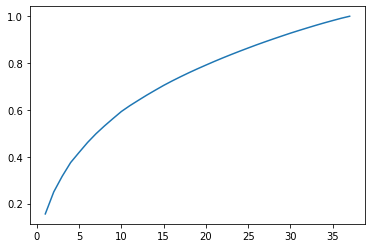

In [25]:
cumsum = [sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_))]

print(f"{next(x[0] for x in enumerate(cumsum) if x[1] >= 0.95)} PC's are needed out of {len(cumsum)} for an explained variance of 95%")

plt.plot(range(1, len(pca.explained_variance_ratio_)), cumsum)
plt.show()

### b) Make a scatterplot of the projections on the first two PC‘s with the colouring corresponding to the class labels. (2 points)


<AxesSubplot:xlabel='0', ylabel='1'>

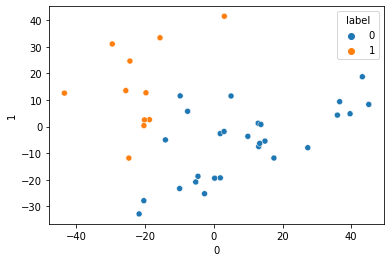

In [26]:
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=pca_df['label'])

### c) Inform yourself about the different types of dimensionality reduction and compare the scatterplot of PCA with plots of TSNE. (1 point)

/Users/vinay/.virtualenvs/AI_2022/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/vinay/.virtualenvs/AI_2022/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


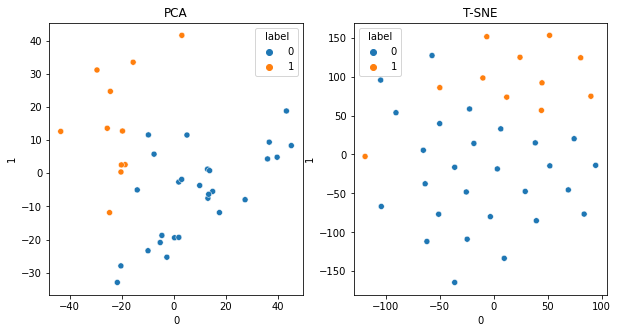

In [30]:
X_tsne = TSNE().fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, index=X.columns)
tsne_df['label'] = y['x'].values

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.set_title('PCA')
sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=pca_df['label'], ax=ax1)
ax2.set_title('T-SNE')
sns.scatterplot(x=tsne_df[0], y=tsne_df[1], hue=tsne_df['label'], ax=ax2)

plt.show()

### d) Based on the scatterplot, answer the following questions (2 points)

#### i) Given the plot, do you think PCA might be a good choice? Why?

**Answer: PCA is a good choice, better than T-SNE for this dataset.**


#### ii) Do you think n=2 components are a good choice? Why?

**Answer: 2 PC's is a good choice, as although the explained variance of the 2 PC's is not good, the data is still linearly seperable with just 2 PC's.**

## 2. Inform yourself regarding decorrelation of features in a dataset

### a) Identify the correlated features in the dataset (1 point)

There are 810 of correlated features (-0.8 > correlation co-eff > 0.8), as it can be seen in the result below,


gene_name                    gene_name                  
Z46632_r_at                  U70735_at                     -0.870049
X13334_at                    U70735_at                     -0.859477
U46499_at                    HG1612-HT1612_at              -0.851100
U70451_at                    HG1496-HT1496_s_at            -0.847972
X56199_at                    M58459_at                     -0.844377
                                                              ...   
X99076_rna1_at               X13334_at                      0.995501
M27394_s_at                  X07203_at                      0.996016
X65977_at                    L77701_at                      0.998253
X13334_at                    Z46632_r_at                    0.998375
AFFX-HUMISGF3A/M97935_MA_at  AFFX-HUMISGF3A/M97935_MA_at    1.000000
Length: 4652776, dtype: float64

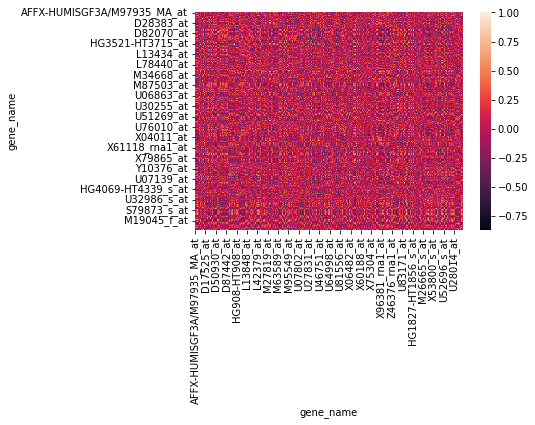

In [31]:
sns.heatmap(X.transpose().corr())

print(f"There are {len([x for x in X.transpose().corr().unstack().drop_duplicates() if x > 0.8 or x < -0.8])} of correlated features (-0.8 > correlation co-eff > 0.8), as it can be seen in the result below,")

X.transpose().corr().unstack().sort_values().drop_duplicates()

### b) Decorrelate the correlated datasets (1 point)

In order to decorrelate the correlated features, we can carry out PCA again.

After carrying out PCA, there are 1 of correlated features (-0.8 > correlation co-eff > 0.8), as it can be seen in the result below,


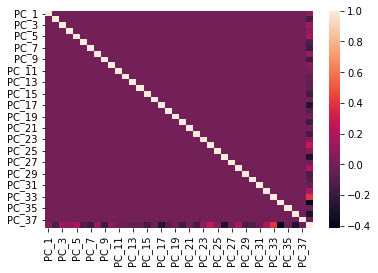

In [32]:
pca = PCA()
X_decorr = pd.DataFrame(pca.fit_transform(X_scaled), index=X.columns, columns=[f"PC_{i}" for i in range(1, 39)])

print(f"After carrying out PCA, there are {len([x for x in X_decorr.transpose().corr().unstack().drop_duplicates() if x > 0.8 or x < -0.8])} of correlated features (-0.8 > correlation co-eff > 0.8), as it can be seen in the result below,")

sns.heatmap(X_decorr.corr())
plt.show()

# Exercise 3 - Logistic Regression (6 points)

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, brier_score_loss
import numpy as np

## Using the reduced dataset from exercise 2.1, carry out the following task: Inform yourself about scikit-learn and utilize the library to generate a logistic regression model on the first 5 PCs of the reduced dataset  (2 points)

In [34]:
x = X_decorr.iloc[:, :5].copy()
y = pd.read_csv('golub.cl.csv')["x"]
x.head()

PC_1       PC_2       PC_3       PC_4      PC_5
V1   0.243158 -19.424365  -8.474252  -8.346121 -5.299346
V2   5.018980  11.522472  14.360514   3.520205  1.981562
V3  -2.693135 -25.283939  19.645643  11.170117  0.933141
V4   1.899674 -19.314634  -1.400227  -9.767072 -0.149289
V5  36.617914   9.380689   5.322328 -18.531695 -1.493813

In [35]:
clf = LogisticRegression()
clf.fit(x, y)
pred = clf.predict(x)
pred_prob = clf.predict_proba(x)

## Inform yourself about Brier’s Score. How can it be used to evaluate the performance of your model? Show by implementation. (2 points)

Brier's score is an evaluation metric for classification tasks used to check the accuracy of a predicted probability score.

$\text{Brier score} = \frac{1}{N} \sum_{t\,=\,1}^N (f_t – o_t)^2$

In [38]:
brier_score = brier_score_loss(y, pred_prob[:,1])
print("brier score:",brier_score)

brier score: 5.215074045033825e-05


## How can you assess the quality of the built regression model? Use an appropriate hypothesis test. (2 points)

By using likelihood-ratio test

In [39]:
from sklearn.metrics import log_loss
from scipy.stats import chi2

lr = LogisticRegression()
lr.fit(x, y)

alternate_model = lr.predict_proba(x)
null_model = sum(y)/float(y.shape[0])*np.ones(y.shape) #Null model containing the intercept

df = x.shape[1]
alt_log_likelihood = -log_loss(y, alternate_model, normalize = False)
null_log_likelihood = -log_loss(y, null_model, normalize = False)

likelihood_ratio = 2*(alt_log_likelihood - null_log_likelihood) #Log-likelihood Ratio
p_value = chi2.sf(likelihood_ratio, df)
print(likelihood_ratio)
print(p_value)

45.50560587141303
1.1449963784507064e-08
